# Visualización de los datos

La visualización de los datos es una parte fundamental en el análisis de datos. 

## ¿Por qué visualizar datos?

La visualización de datos es una parte fundamental en el análisis de datos. Nos permite:

- Identificar patrones y relaciones en los datos.
- Comunicar los resultados de un análisis de datos.
- Identificar errores en los datos.
- Explorar los datos.

## ¿Qué es un gráfico?

Un gráfico es una representación visual de los datos. Existen diferentes tipos de gráficos, como por ejemplo:

- Gráfico de líneas.
- Gráfico de barras.
- Gráfico de pastel.
- Gráfico de dispersión.


## ¿Qué es `matplotlib`?

`matplotlib` es una librería de Python que nos permite crear gráficos de alta calidad.

https://matplotlib.org/

##  ¿Qué es `seaborn`?

`seaborn` es una librería de Python que nos permite crear gráficos estadísticos de alta calidad.

https://seaborn.pydata.org/


## ¿Cómo instalar `matplotlib` y `seaborn` ?

Para instalar `matplotlib` podemos utilizar `conda install` o `pip install`:

```
conda install matplotlib seaborn
```

## ¿Cómo utilizar `matplotlib` y `seaborn`?

In [1]:
# Importar las librerías:

import matplotlib.pyplot as plt
import seaborn as sns

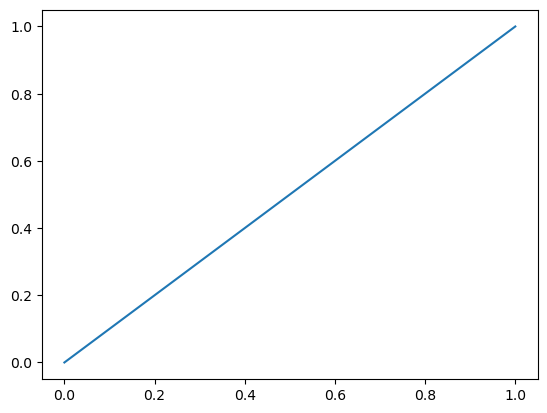

In [2]:
### Crear un gráfico con matplotlib
plt.figure() # Crear una figura
plt.plot([0, 1], [0, 1]) # Dibujar una línea
plt.show() # Mostrar el gráfico

### Personalizar un gráfico

Podemos personalizar un gráfico con `matplotlib` utilizando diferentes funciones, como por ejemplo:

- `xlabel`: para añadir una etiqueta al eje x.
- `ylabel`: para añadir una etiqueta al eje y.
- `title`: para añadir un título al gráfico.
- `legend`: para añadir una leyenda al gráfico.
- `grid`: para añadir una cuadrícula al gráfico.

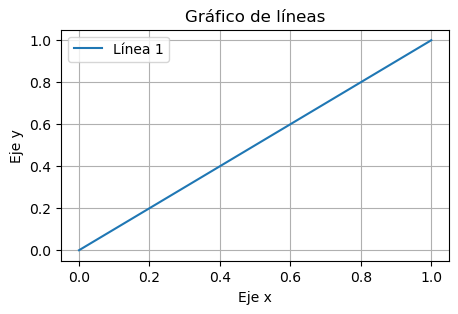

In [3]:
### Crear un gráfico con matplotlib
plt.figure(figsize=(5, 3)) # Crear una figura con tamaño personalizado
plt.plot([0, 1], [0, 1]) # Dibujar una línea
plt.xlabel('Eje x') # Etiqueta del eje x
plt.ylabel('Eje y') # Etiqueta del eje y
plt.title('Gráfico de líneas') # Título del gráfico
plt.legend(['Línea 1']) # Leyenda
plt.grid(True) # Mostrar la cuadrícula
plt.show() # Mostrar el gráfico

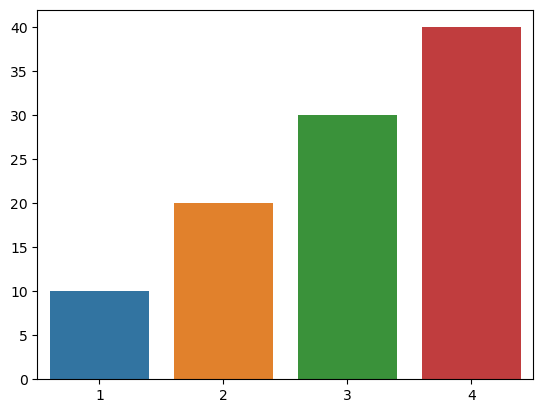

In [4]:
# Para crear un gráfico con `seaborn` podemos utilizar la función `barplot`

sns.barplot(x=[1, 2, 3, 4], y=[10, 20, 30, 40]) # Crear un gráfico de barras
plt.show() # Mostrar el gráfico

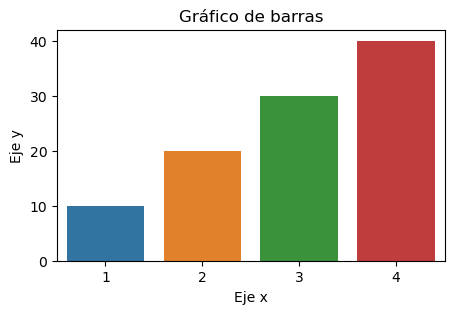

In [5]:
# Para personalizar el gráfico de barras, podemos utilizar las funciones de `matplotlib`
plt.figure(figsize=(5, 3))
sns.barplot(x=[1, 2, 3, 4], y=[10, 20, 30, 40])
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.title('Gráfico de barras')
plt.show()

##  Gráficas de la base de datos

### Gráficas de barras

Las gráficas de barras son útiles para comparar diferentes categorías.

### Gráficas de pastel

Las gráficas de pastel son útiles para mostrar la proporción de diferentes categorías.

### Gráficas de dispersión

Las gráficas de dispersión son útiles para mostrar la relación entre dos variables.

### Gráficas de líneas

Las gráficas de líneas son útiles para mostrar la evolución de una variable a lo largo del tiempo.



### Preprocesamiento de datos para visualización

In [6]:
import pandas as pd
import os
import numpy as np

In [7]:

def rename(data):
    '''
    Renombrar columnas: Bucle en los encabezados para :
    1. Poner todo en minúsculas
    2. Eliminar los espacios
    3. Remplazar espacio entre palabras por "_"
    '''
    new_col_names = []

    for name in data.columns:
        # Luego, pon todas las letras en minúsculas
        name_lowered = name.lower()
        # Elimina los espacios al principio y al final
        name_stripped = name_lowered.strip()
        # Por último, reemplaza los espacios entre palabras por guiones bajos
        name_no_spaces = name_stripped.replace(' ', '_')
        # Agrega el nuevo nombre a la lista de nuevos nombres de columna
        new_col_names.append(name_no_spaces)

    # Reemplaza los nombres anteriores por los nuevos
    data.columns = new_col_names
    


In [8]:
# mostrar información del DataFrame
def info(df):
    display(df.head(10))
    print()
    print(df.info())
    print()
    print(df.describe())
    print()
    print('Duplicated: ',df.duplicated().sum())
    print()
    print('Null values %:')
    print(100*df.isnull().sum()/len(df))


### Titanic: Machine Learning from Disaster

https://www.kaggle.com/competitions/titanic

In [9]:
mainpath = "./datasets/" 
filename = "train.csv"
fullpath = os.path.join(mainpath, filename)
data = pd.read_csv (fullpath)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preprocesamiento de datos

In [10]:
info(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486

In [11]:
rename(data)

In [12]:
data.dropna(inplace=True)

In [13]:
desired_columns = ['survived', 'age', 'sex', 'pclass', 'embarked']
subset = data[desired_columns] #crear el subset de columnas de la lista

In [14]:
info(subset)

,survived,age,sex,pclass,embarked
1,1,38.0,female,1,C
3,1,35.0,female,1,S
6,0,54.0,male,1,S
10,1,4.0,female,3,S
11,1,58.0,female,1,S
21,1,34.0,male,2,S
23,1,28.0,male,1,S
27,0,19.0,male,1,S
52,1,49.0,female,1,C
54,0,65.0,male,1,C



<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  183 non-null    int64  
 1   age       183 non-null    float64
 2   sex       183 non-null    object 
 3   pclass    183 non-null    int64  
 4   embarked  183 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 8.6+ KB
None

         survived         age      pclass
count  183.000000  183.000000  183.000000
mean     0.672131   35.674426    1.191257
std      0.470725   15.643866    0.515187
min      0.000000    0.920000    1.000000
25%      0.000000   24.000000    1.000000
50%      1.000000   36.000000    1.000000
75%      1.000000   47.500000    1.000000
max      1.000000   80.000000    3.000000

Duplicated:  37

Null values %:
survived    0.0
age         0.0
sex         0.0
pclass      0.0
embarked    0.0
dtype: float64


<Figure size 200x200 with 0 Axes>

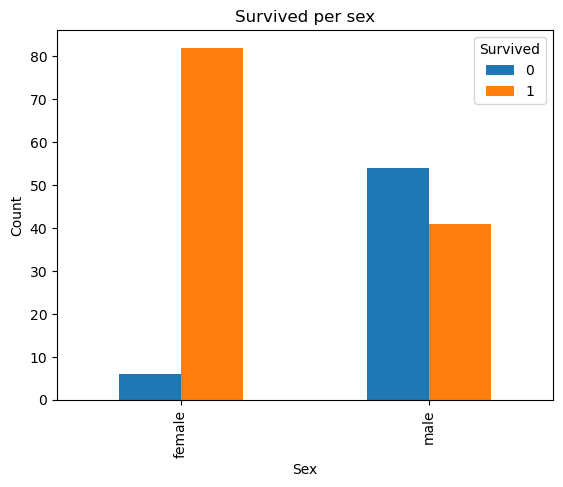

In [15]:
'''
Gráfico de barras

1. agrupar por ciudad groupby('city')
2. contar los valores de la columna 'day' value_counts()
3. desapilar los valores unstack()
4. graficar los valores plot(kind='bar')
'''


city_per_day = subset.groupby('sex')['survived'].value_counts(normalize=False).unstack()
plt.figure(figsize=(2, 2))
city_per_day.plot(kind='bar',stacked=False)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survived per sex')
plt.legend(title='Survived')
plt.show()

## Regla de Sturges

La regla de Sturges es una regla empírica que nos permite determinar el número de divisiones de un histograma.

https://es.wikipedia.org/wiki/Regla_de_Sturges

(array([10., 13., 35., 43., 25., 32., 18.,  6.,  1.]),
 array([ 0.92      ,  9.70666667, 18.49333333, 27.28      , 36.06666667,
        44.85333333, 53.64      , 62.42666667, 71.21333333, 80.        ]),
 <BarContainer object of 9 artists>)

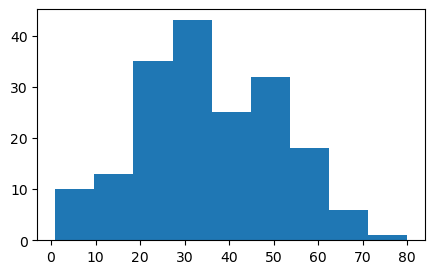

In [16]:
k = int(np.ceil(1+np.log2(len(subset)))) #regla de sturges con un numero entero
plt.figure(figsize=(5, 3))
plt.hist(subset['age'], bins=k)


### La diferencia entre un histograma y un gráfico de barras es que un histograma es una representación gráfica de la distribución de una variable continua, mientras que un gráfico de barras es una representación gráfica de la distribución de una variable categórica.


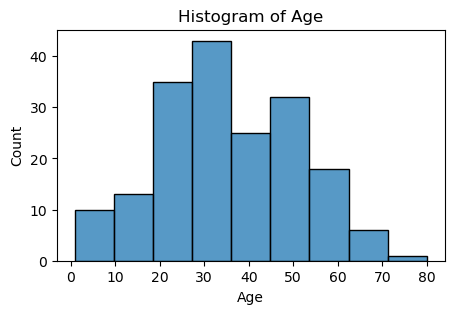

In [17]:
plt.figure(figsize=(5, 3))
sns.histplot(data=subset, x='age', bins = k)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()


## Graficar de dispersión

La gráfica de dispersión es útil para mostrar la relación entre dos variables.

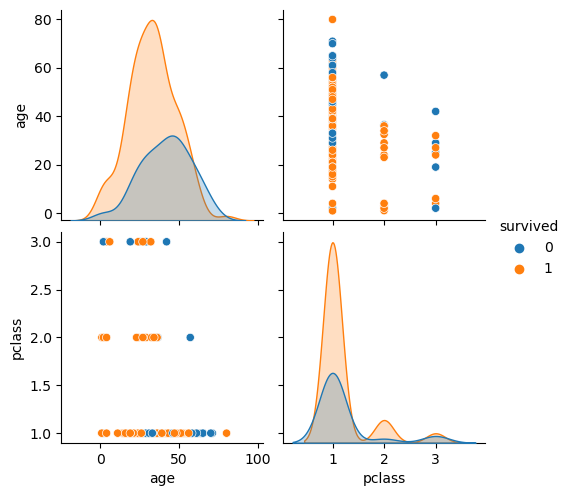

In [18]:
# grafica de dspersion de todas las variables

sns.pairplot(subset, hue='survived') #hue es la variable que se va a diferenciar            
                

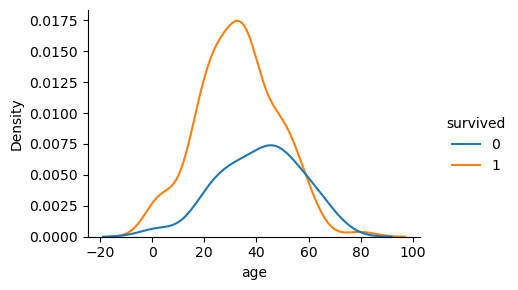

In [19]:

sns.displot(subset, x="age", hue="survived", kind="kde", height=3, aspect=1.5) # grafico de densidad de probabilidad

## Boxplot

El boxplot es útil para visualizar la distribución de una variable. 

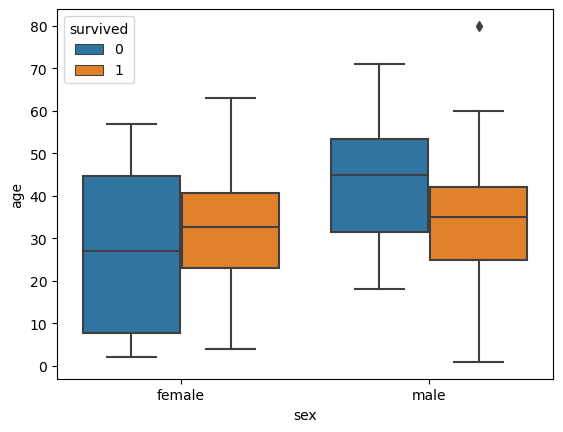

In [20]:
sns.boxplot(data=subset, x='sex', y='age', hue='survived') 
plt.show()


## Diagrama de caja y bigotes

El diagrama de caja y bigotes es un gráfico que nos permite visualizar la distribución de una variable. Los elementos del diagrama de caja y bigotes son:

- La caja: representa el rango intercuartílico.

- Los bigotes: representan el rango de los datos.

- Los puntos: representan los valores atípicos.

<center> <div> <img src="fig/boxplot.png" alt="Drawing" style="width: 500px;"/></div>

## Cuartiles

Los **cuantiles** son puntos tomados a intervalos regulares de la función de distribución de una variable aleatoria.

Los **cuartiles** son cuantiles que se multiplican por un cuarto de un conjunto de datos, siendo los tres puntos que dividen el conjunto de datos en cuatro grupos iguales, cada grupo comprende un cuarto de los datos.

**Q1**: es el número medio entre el número más pequeño y la mediana del conjunto de datos. 

**Q2**: es la mediana de los datos. 

**Q3**: es el valor medio entre la mediana y el valor más alto del conjunto de datos. 

La diferencia entre **Q3** y **Q1** es el rango intercuartilar **IQR**

                IQR = Q3 - Q1

Cualquier punto de datos que se encuentre fuera del rango de decisión definido como:

                Límite inferior: (Q1 - 1.5 * IQR)
                Límite superior: (Q3 + 1.5 * IQR)

se considera un valor atípico.

## Por que 1.5?

<center> <div> <img src="fig/gauss.jpg" alt="Drawing" style="width: 500px;"/></div>



* Alrededor del 68.26% de todos los datos se encuentran dentro de una desviación estándar ($<\sigma$) de la media ($\mu$), teniendo en cuenta ambos lados (región rosa)

* Alrededor del 95.44% de todos los datos se encuentran dentro de dos desviaciones estándar ($2\sigma$) de la media ($\mu$), teniendo en cuenta ambos lados (región rosa+azul).

* Alrededor del 99.72% de todos los datos se encuentran dentro de las tres desviaciones estándar ($<3\sigma$) de la media ($\mu$), teniendo en cuenta ambos lados (región rosa+azul+verde).

* El 0.28% restante de todos los datos se encuentra fuera de las tres desviaciones estándar ($>3\sigma$) de la media ($\mu$), teniendo en cuenta ambos lados (región roja). Esta parte de los datos se considera como valores atípicos.

1. Los cuartiles **Q1** y **Q3**, se encuentran a -0.675 $\sigma$ y +0.675 $\sigma$ de la media, respectivamente.

2. Cuando la escala se toma como 1.5, de acuerdo con el método **IQR**:

                Límite inferior
                = Q1 - 1.5 * IQR
                = Q1 - 1.5 * (Q3 - Q1)
                = -0.675σ - 1.5 * (0.675 - [-0.675])σ
                = -0.675σ - 1.5 * 1.35σ
                = -2.7σ

                Límite superior:
                = Q3 + 1.5 * IQR
                = Q3 + 1.5 * (Q3 - Q1)
                = 0.675σ + 1.5 * (0.675 - [-0.675])σ
                = 0.675σ + 1.5 * 1.35σ
                = 2.7σ


entonces, cualquier dato que se encuentre más allá de 2.7 $\sigma$ de la media ($\mu$), en cualquier lado, se considerará como atípico, y este rango de decisión es el más cercano a lo que nos dice la distribución gaussiana, es decir, 3 $\sigma$.

In [21]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(subset['age'].quantile(percentages)) #calcular los cuantiles
df.index = [f'{p * 100}%' for p in percentages] 
print(df.transpose())

     5.0%  25.0%  50.0%  75.0%  95.0%
age   6.5   24.0   36.0   47.5   60.9


In [22]:
subset.describe()

,survived,age,pclass
count,183.000000,183.000000,183.000000
mean,0.672131,35.674426,1.191257
std,0.470725,15.643866,0.515187
min,0.000000,0.920000,1.000000
25%,0.000000,24.000000,1.000000
50%,1.000000,36.000000,1.000000
75%,1.000000,47.500000,1.000000
max,1.000000,80.000000,3.000000


## Rango intercuartilar (IQR)

In [23]:
# resta entre el primer y tercer cuartil es el IQR = rango intercuatilico (Q3-Q1=IQR)
IQR=subset["age"].quantile(0.75)-subset["age"].quantile(0.25)
print("El rango intercuartilar (IQR) es:", IQR)

El rango intercuartilar (IQR) es: 23.5


## Barras de error

In [24]:
low_bound = subset["age"].quantile(0.25) - (1.5*IQR) #inferior
upper_bound = subset["age"].quantile(0.75) + 1.5*IQR #superior
print("El límite superior es:", upper_bound)
print("El límite inferior es:", low_bound)

El límite superior es: 82.75
El límite inferior es: -11.25


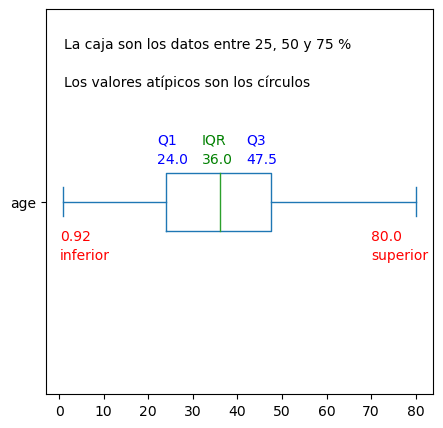

In [25]:
# Calcular los cuantiles y límites una sola vez
low_bound = subset["age"].min()
upper_bound = subset["age"].max()
q1 = subset["age"].quantile(0.25)
median = subset["age"].quantile(0.50)
q3 = subset["age"].quantile(0.75)

# Graficar el boxplot
subset['age'].plot.box(vert=False, figsize=(5, 5))

# Anotaciones de texto
annotations = [
    (1, 1.4, 'La caja son los datos entre 25, 50 y 75 %', 'black'),
    (1, 1.3, 'Los valores atípicos son los círculos', 'black'),
    (0.2, 0.85, "inferior", 'r'),
    (0.2, 0.9, low_bound, 'r'),
    (70, 0.85, "superior", 'r'),
    (70, 0.9, upper_bound, 'r'),
    (22, 1.15, "Q1", 'b'),
    (22, 1.1, q1, 'b'),
    (32, 1.15, "IQR", 'g'),
    (32, 1.1, median, 'g'),
    (42, 1.15, "Q3", 'b'),
    (42, 1.1, q3, 'b')
]

for x, y, text, color in annotations:
    plt.text(x, y, text, color=color)

# Mostrar la gráfica
plt.show()

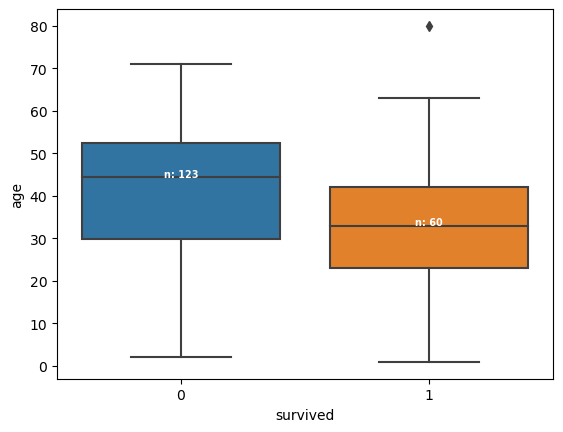

In [26]:
# Calcular los cuantiles y límites una sola vez
df = subset
ax = sns.boxplot(x="survived", y="age", data = df)

# Calculate number of obs per group & median to position labels
medians = df.groupby(['survived'])['age'].median().values
nobs = df['survived'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):#El i-ésimo elemento en cada tupla 
    ax.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='semibold'
            )
plt.show()

## Matriz de correlación

La matriz de correlación es una tabla que nos permite visualizar la relación entre las variables de un conjunto de datos.

## Mapa de calor

El mapa de calor es una representación visual de la matriz de correlación.


In [27]:
def corr_matrix(data): #matriz de correlación
    correlation = data.corr()
    plt.figure(figsize=(5, 3))
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")


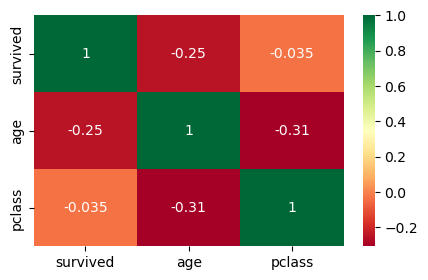

In [28]:
corr_matrix(subset)